# **PSY 452 - Advanced Neurophysiological Psychology**

## ***Hodgkin-Huxley Neuromorphic Model Demonstration for Presentation*** by Dan Jang

### The Hodgkin-Huxley Model [[1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413/)], Illustrated [[2](https://github.com/rasnell/pyHH)]

![Credits to [2]](psy452-theory-creditsScottWHarden[1].png)

### The Full Hodgkin-Huxley Model [[1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413/)] Equations (in LaTeX [[3](https://www.fuw.edu.pl/~jarekz/MODELOWANIE/Hh/HH_exercises.tex)])

"The Hodgkin-Huxley equations using modern conventions are given by:

\begin{align}
\frac{dV}{dt} &= \left[I_{inj} - \bar{g}_{Na}m^3h(V-V_{Na}) -\bar{g}_Kn^4(V-V_K) - g_L (V-V_L)\right]/C\\
\frac{dn}{dt} &= \alpha_n(V) (1-n) - \beta_n(V)n\\
\frac{dm}{dt} &= \alpha_m(V) (1-m) - \beta_m(V)m\\
\frac{dh}{dt} &= \alpha_h(V) (1-h) - \beta_h(V)h
\end{align}

where:

\begin{align}
\alpha_n(V) &= \frac{0.01(V+55)}{1-\exp[-(V+55)/10]} \\
\beta_n(V) &= 0.125\exp[-(V+65)/80]\\
\alpha_m(V) &= \frac{0.1(V+40)}{1-\exp[-(V+40)/10]} \\
\beta_m(V) &= 4\exp[-(V+65)/18]\\
\alpha_h(V) &= 0.07\exp[-(V+65)/20] \\
\beta_h(V) &= \frac{1}{1+\exp[-(V+35)/10]}
\end{align}

The values of the constants are:

- $C=1 \mu F/cm^2$;
- $\bar{g}_{Na} = 120 mS/cm^2$; 
- $V_{Na}= 50 mV$;

- $\bar{g}_K=36 mS/cm^2$;
- $V_K=-77 mV$;

- $g_L=0.3 mS/cm^2$;
- $V_L=-54 mV$;

In these equations, voltages are in $mV$, current densities in $\mu A/cm^2$, capacitance in $\mu F/cm^2$, and time in $ms$." [[3](https://www.fuw.edu.pl/~jarekz/MODELOWANIE/Hh/HH_exercises.tex)]

### Quick & Concise Variate & Verbose Variables List Made Easier-to-Understand [[1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413/)]

![[1, p. 501]](PSY452-WingatePresentationFoto3.png)

1. **Vm**: Membrane Potential - Describes the electrochemical gradient across the neuron membrane. This variable is what the Hodgkin-Huxley model primarily focuses on to predict, etc!

2. **Cm**: Membrane Capacitance - Represents the ability of the neuron membrane to store charge as a constant variable!

3. **I**: External Current - The current, in our case, represents Squidward's impulse as output, applied to Rob, the Motor Neuron, to start positioning his clarinet!

4. **gNa, gK, gL**: Maximum Conductances for the Sodium (Na+) Cation, Potassium (K+) Cation, and Leak (L {e.g., Chlorine Cation (Cl)- or Calcium Anion (Ca2+)}) Channels!

5. **ENa, EK, EL**: Equilibrium Potentials for Sodium (Na+) Cation, Potassium (K+) Cation, and Leak (L {e.g., Chlorine Cation (Cl)- or Calcium Anion (Ca2+)}) Channels! These values represent the membrane potential, when reached, results / indicates no net flux in-between the membrane (intracellular space {e.g., axoplasm} or extracellular space)!

6. **m, h**: Sodium (Na+) channel activation and inactivation probability variables, they are also called & part of the gate variables!

7. **n**: Potassium (K+) channel activation probability variable, also one of the gate variables!

8. **alpha/beta + _ + n/m/h**: These represent rate constants. Alpha for opening & Beta for closing. Followed by either n, m, or h, representing the gate variables as described above!

9. **INa, IK, IL**: Currents that are folowing through the Sodium (Na+) Cation, Potassium (K+) Cation, and Leak (L {e.g., Chlorine Cation (Cl)- or Calcium Anion (Ca2+)}) Ionic Channels!

### Part 0: ***Initialization***

c:\tools\miniconda3\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
c:\tools\miniconda3\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
c:\tools\miniconda3\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
ERROR: Could not find a version that satisfies the requirement scipy.integrate (from versions: none)
ERROR: No matching distribution found for scipy.integrate


simulating 20000 time points...
[E3<Squid-Clarinet>] bruh squidward's robert motor neuron model might be misconfigured lol
[0.0000e+00 1.0000e-02 2.0000e-02 ... 1.9997e+02 1.9998e+02 1.9999e+02] [0. 0. 0. ... 0. 0. 0.] b


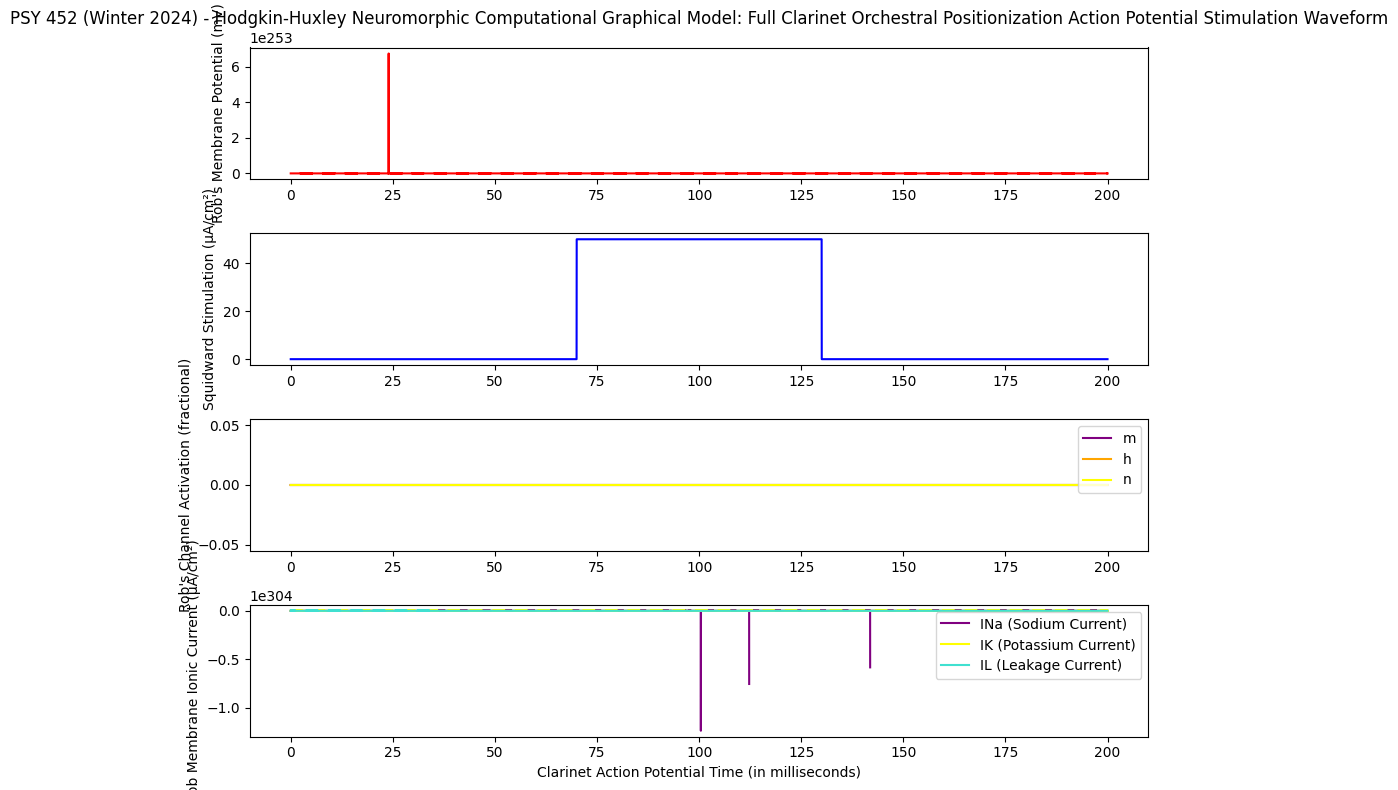

In [17]:
#### PSY 452 (Winter 2024) - Advanced Neurophysiological Psychology: Part 0, Initialization
### By Dan Jang

## I.) Installing necessary packages
!pip install numpy
!pip install matplotlib.pyplot
!pip install scipy.integrate

# ## II.) Importing essential packages + pyHodgkin-Huxley package [1]

# import sys
# import os

# currpath = os.path.join(os.getcwd(), 'libraries', 'pyhh')

# if currpath not in sys.path:
#     sys.path.append(currpath)

## II.) Importing essential packages + pyHodgkin-Huxley package [1]

import numpy as np
import matplotlib.pyplot as plot
import scipy.integrate
from scipy.integrate import odeint

import pyhh as hodhux

## III.) Create full Hodgkin-Huxley model-based action potential stimulation

## III.A) Create Squidward's Rob Motor Neuron :^)
class Squidward:
    def __init__(self):
        self.robert, self.gNa, self.gK, self.gL, self.Cm, self.ENa, self.EK, self.EL, self.I, self.Vm, self.m, self.h, self.n, self.t, self.pulse, self.pulsex, self.pulsey, self.movement, self.playtime = None, 120.0, 36.0, 0.3, 1.0, 50.0, -77.0, -54.387, 10.0, -65.0, 0.052, 0.596, 0.317, 50, 7000, 13000, None, 0.01, np.zeros(20000)

        self.robert = Robert()
        
    # Essentially, a funny named new-custom constructor
    def tentacles(self, robert, gNa, gK, gL, Cm, ENa, EK, EL, I, Vm, m, h, n, t, pulse, pulsex, pulsey, movement, timestep):
        
        if robert is None:
            if self.robert is None:
                self.robert = Robert()
        
        else:
            try:
                self.robert.activation(robert, gNa, gK, gL, Cm, ENa, EK, EL, I, Vm, m, h, n, t, pulse, pulsex, pulsey)
            except:
                print("[E1<Squid-Init>] bruh u might have missed a neuronal parameter for rob lol")
        
        self.playtime = np.zeros(t) #self.robert.t
        self.playtime[pulsex:pulsey] = pulse
        
        #if clarinet is None:
            #if self.clarinet is None:
        if timestep is None:
            timestep = 0.01
        if movement is None:
            self.movement = hodhux.Simulation(self.robert.model)
            self.clarinet(self.playtime, timestep, self.movement)
        else:
            self.clarinet(self.playtime, timestep, movement)
                #self.clarinet = clarinet(t, timestep, )
                
        #self.playtime = self.robert.t
        
    def clarinet(self, playtime, timestep, movement):
        if playtime is None:
            playtime = np.zeros(20000)
            
        if timestep is None:
            timestep = 0.01
        
        if movement is None:
            movement = hodhux.Simulation(self.robert.model)
            movement.Run(stimulusWaveform=playtime, stepSizeMs=timestep)
            self.movement = movement
            #print("[E4<Squid-Clarinet>] bruh u gotta pass a movement thingy so u can actually graph the results u silly head lol")
        
        else:
            try:
                movement.Run(stimulusWaveform=playtime, stepSizeMs=timestep)
                self.movement = movement
            except:
                print("[E3<Squid-Clarinet>] bruh squidward's robert motor neuron model might be misconfigured lol")
    
    def sheetmusic(self, figsizex, figsizey, color1, color2, color3, color4, color5, color6, color7, color8, title):
        #try:
        if figsizex:
            if figsizey:
                plot.figure(figsize=(figsizex, figsizey))
        else:
            plot.figure(figsize=(10, 8))
        # except:
        #     print("[E4<Squid-SheetMusic>] bruh u might have missed the figure sizes for the sheet music lol")
        
        if title is None:
            title = "PSY 452 (Winter 2024) - Hodgkin-Huxley Neuromorphic Computational Graphical Model"
            
        else:
            title = "PSY 452 (Winter 2024) - Hodgkin-Huxley Neuromorphic Computational Graphical Model: " + title
            
        if self.movement is None:
            print("[E4<Squid-SheetMusic>] bruh squidward apparently hasnt moved his clarinet or if he did, it wasn't recorded u silly goose lol")
        
        if self.robert is None:
            print("[E5<Squid-SheetMusic>] bruh somehow at this stage, Robert the Motor Neuron still has not been created yet, you are one silly goose dan lmao")
        
        else:
            movement = self.movement # lazy but saves typing self. each time lmao
            # Potential (mV) Color
            if color1 is None:
                color1 = 'r'
            
            # Input Stimulation (µA/cm^2) Color
            if color2 is None:
                color2 = 'b'
            
            # Sodium Activation Gating Variable (m) Color
            if color3 is None:
                color3 = 'purple'
            
            # Sodium Inactivation Gating Variable (h) Color
            if color4 is None:
                color4 = 'orange'
            
            # Potassium Activation Gating Variable (n) Color
            if color5 is None:
                color5 = 'yellow' # BANANA
                
            # Sodium Current (INa) (µA/cm^2) Color
            if color6 is None:
                color6 = 'purple'
                
            # Potassium Current (IK) (µA/cm^2) Color
            if color7 is None:
                color7 = 'yellow'
                
            # Leak Current (IL) (µA/cm^2) Color
            if color8 is None:
                color8 = 'turquoise'
                
            ## Credits to [2] for parts from README.md Example Code
            
            # Potential (mV) Plot #1
            potentialplt = plot.subplot(411)
            potentialplt.set_title(title)
            potentialplt.set_ylabel("Rob's Membrane Potential (mV)")
            potentialplt.plot(movement.times, movement.Vm, color=color1)
            
            
            # Input Stimulation (µA/cm^2) Plot #2
            stimulationplt = plot.subplot(412)
            stimulationplt.set_ylabel("Squidward Stimulation (µA/cm²)")
            playtime = self.playtime
            ## Sanity Debug Print Statement
            print(movement.times, playtime, color2)
            stimulationplt.plot(movement.times, playtime, color=color2)
            
            # Gating Variable Activation (m/h/n) Plot #3
            activationplt = plot.subplot(413, sharex=potentialplt)
            activationplt.set_ylabel("Rob's Channel Activation (fractional)")
            activationplt.plot(movement.times, movement.StateM, label='m', color=color3)
            activationplt.plot(movement.times, movement.StateH, label='h', color=color4)
            activationplt.plot(movement.times, movement.StateN, label='n', color=color5)
            activationplt.legend()
            
            # Ionic Channel Current Plot (INa/IK/Ileak) Plot #4
            currentplt = plot.subplot(414, sharex=potentialplt)
            currentplt.set_xlabel("Clarinet Action Potential Time (in milliseconds)")
            currentplt.set_ylabel("Rob Membrane Ionic Current (µA/cm²)")
            currentplt.plot(movement.times, movement.INa, label='INa (Sodium Current)', color=color6)
            currentplt.plot(movement.times, movement.IK, label='IK (Potassium Current)', color=color7)
            currentplt.plot(movement.times, movement.IKleak, label='IKLeak (KLeakage Current)', color=color8)
            currentplt.legend()
            
            plot.tight_layout()
            plot.savefig("PSY452-FullSquidwarClarinetActionPotentialStimulationWave-DanJ.png")
            plot.show()
    
class Robert:
        def __init__(self):
            self.model = None
            self.t = None
            
        def activation(self, model, gNa, gK, gL, Cm, ENa, EK, EL, I, Vm, m, h, n, t, pulse, pulsex, pulsey):
                        
            if model is None:
                if self.model is None:
                    robert = hodhux.HHModel()

                    # Squidward's Rob Motor Neuron Parameter, gNa: Avg. Na+ (Sodium cation) conductance per unit area (mS/cm^2)
                    robert.gNa = 120.0

                    # Squidward's Rob Motor Neuron Parameter, gK: Avg. K+ (Potassium cation) conductance per unit area (mS/cm^2)
                    robert.gK = 36.0

                    # Squidward's Rob Motor Neuron Parameter, gL: Avg. Leak (e.g., Chlorine anions / Calcium {2+} cations) conductance per unit area (mS/cm^2)
                    robert.gL = 0.3

                    # Squidward's Rob Motor Neuron Parameter, Cm: Membrane capacitance per unit area (uF/cm^2)
                    robert.Cm = 1.0

                    # Squidward's Rob Motor Neuron Parameter, ENa: Sodium cation Nernst reversal potential (mV)
                    robert.ENa = 50.0

                    # Squidward's Rob Motor Neuron Parameter, EK: Potassium cation Nernst reversal potential (mV)
                    robert.EK = -77.0

                    # Squidward's Rob Motor Neuron Parameter, EL: Leak Nernst reversal potential (mV)
                    robert.EL = -54.387

                    # Squidward's Rob Motor Neuron Parameter, I: External current (uA/cm^2)
                    robert.I = 10.0

                    # Squidward's Rob Motor Neuron Parameter, Vm: Membrane potential (mV)
                    robert.Vm = -65.0

                    # Squidward's Rob Motor Neuron Parameter, m: Sodium cation activation gating variable
                    robert.m = 0.052

                    # Squidward's Rob Motor Neuron Parameter, h: Sodium cation inactivation gating variable
                    robert.h = 0.596

                    # Squidward's Rob Motor Neuron Parameter, n: Potassium cation activation gating variable
                    robert.n = 0.317
                    
                    # Stimulus Waveform thingy
                    self.t = np.zeros(20000)
                    
                    # Stimulus Waveform <+ Square Pulse
                    self.t[7000:13000] = 50
                    
                    self.model = robert
            try:
                
                robert = self.model
                
                if gNa is not None:
                    robert.gNa = gNa
                    
                if gK is not None:
                    robert.gK = gK
                
                if gL is not None:
                    robert.gL = gL
                    
                if Cm is not None:
                    robert.Cm = Cm
                    
                if ENa is not None:
                    robert.ENa = ENa
                    
                if EK is not None:
                    robert.EK = EK
                    
                if EL is not None:
                    robert.EL = EL
                    
                if I is not None:
                    robert.I = I
                    
                if Vm is not None:
                    robert.Vm = Vm
                    
                if m is not None:
                    robert.m = m
                    
                if h is not None:
                    robert.h = h
                    
                if n is not None:
                    robert.n = n
                    
                if t is not None:
                    # Stimulus Waveform thingy
                    self.t = np.zeros(t)
                
                if pulse is not None:
                    if pulsex is not None:
                        if pulsey is not None:
                            self.t[pulsex:pulsey] = pulse
                    
                self.model = robert
            except:
                print("[E2<SubSquid-Rob-Init>] bruh u might have missed a neuronal parameter for rob within squidward initialization thingy lol")

### Finally, the grand test for class Squidward (main wrapper), with a subclass Robert (le Motor Neuron model encompassing wrapper)

# Reference - Squidward(self, robert, gNa, gK, gL, Cm, ENa, EK, EL, I, Vm, m, h, n, t, pulse, pulsex, pulsey, movement, timestep)
squidward = Squidward()
squidward.tentacles(None, 120.0, 36.0, 0.3, 1.0, 50.0, -77.0, -54.387, 10.0, -65.0, 0.052, 0.596, 0.317, 20000, 50, 7000, 13000, None, 0.01)

# Reference - sheetmusic(self, figsizex, figsizey, color1, color2, color3, color4, color5, color6, color7, color8, title)
#             movement = self.movement # lazy but saves typing self. each time lmao
# # Potential (mV) Color
#     color1 = 'r'
# # Input Stimulation (µA/cm^2) Color
#     color2 = 'b'
# # Sodium Activation Gating Variable (m) Color
#     color3 = 'purple'
# # Sodium Inactivation Gating Variable (h) Color
#     color4 = 'orange'
# # Potassium Activation Gating Variable (n) Color
#     color5 = 'yellow' # BANANA
# # Sodium Current (INa) (µA/cm^2) Color
#     color6 = 'purple'
# # Potassium Current (IK) (µA/cm^2) Color
#     color7 = 'yellow'
# # Leak Current (IL) (µA/cm^2) Color
#     color8 = 'turquoise'

squidward.sheetmusic(10, 8, 'r', 'b', 'purple', 'orange', 'yellow', 'purple', 'yellow', 'turquoise', "Full Clarinet Orchestral Positionization Action Potential Stimulation Waveform")

### Part 1: ***Resting Membrane Potential (RMP)***

In [ ]:
#### PSY 452 (Winter 2024) - Advanced Neurophysiological Psychology: Part 1, Initialization
### By Dan Jang
### Credits to Scott W. Harden for pyhh package [1]



### Part 2: ***Depolarization / Beginning of Action Potential***

In [ ]:
#### PSY 452 (Winter 2024) - Advanced Neurophysiological Psychology: Part 2, Depolarization / Beginning of Action Potential
### By Dan Jang
### Credits to Scott W. Harden for pyhh package [1]

### Part 3: ***Re- / Hyperpolarization to Reach Resting Membrane Potential (RMP)***

In [ ]:
#### PSY 452 (Winter 2024) - Advanced Neurophysiological Psychology: Part 3, Re- / Hyperpolarization to Reach Resting Membrane Potential (RMP)
### By Dan Jang
### Credits to Scott W. Harden for pyhh package [1]

![Nobel Prize Foto, 1952 [4]](PSY452-WingatePresentationFoto1.png) [[4](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3424716/)]

## **References**

[1] S. W. Harden, “swharden/pyHH.” Feb. 11, 2024. [Online]. Available: https://github.com/swharden/pyHH

[2] A. L. Hodgkin and A. F. Huxley, “A quantitative description of membrane current and its application to conduction and excitation in nerve,” J Physiol, vol. 117, no. 4, pp. 500–544, Aug. 1952. [Online]. Available: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413/

[3] J. Żygierewicz, “Exercise 1: The Hodgkin Huxley model.” [Online]. Available: https://www.fuw.edu.pl/~jarekz/MODELOWANIE/Hh/HH_exercises.tex

[4] C. J. Schwiening, “A brief historical perspective: Hodgkin and Huxley,” J Physiol, vol. 590, no. Pt 11, pp. 2571–2575, Jun. 2012, doi: 10.1113/jphysiol.2012.230458.
